# Intra Zone Single Stream Vary Throughput

In this experiment, we sent a single constant-bitrate (CBR) UDP stream from a node in one zone 
to a node in *another* zone and then measure the flow characteristics.
We vary the throughput (data rate of the flow) and investigate how that affects the flow.

Please note that in this test, the endpoint Ethernet links are 100Mbps and the Backbone links are 1000Mbps.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json

import sys
sys.path.insert(0, '../../')
from util.metrics import StreamMetrics, StreamMetricsList

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/intra-zone-single-stream/throughput/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_throughputs():
    # Assumes the throughputs are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'throughput-1000bps', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return np.array(sorted(
        [int(re.search(r"throughput-([0-9]+)bps", directory)[1]) 
         for directory in directories]
    ))


throughputs = get_throughputs()

secure_directories = [f"{SECURE_DIRECTORY}/throughput-{throughput}bps/"
                      for throughput in throughputs]

insecure_directories = [f"{INSECURE_DIRECTORY}/throughput-{throughput}bps/"
                        for throughput in throughputs]

secure_datas = StreamMetricsList([StreamMetrics(directory)
                                  for directory in secure_directories])

insecure_datas = StreamMetricsList([StreamMetrics(directory)
                                    for directory in insecure_directories])

print(f"THROUGHPUTS:\t{throughputs}")

print(f"SECURE LATENCIES:\t{secure_datas.mean_latency()}")
print(f"INSECURE LATENCIES:\t{insecure_datas.mean_latency()}")

print(f"SECURE THROUGHPUTS:\t{secure_datas.mean_throughput()}")
print(f"INSECURE THROUGHPUTS:\t{insecure_datas.mean_throughput()}")

print(f"SECURE JITTERS:\t{secure_datas.mean_jitter()}")
print(f"INSECURE JITTERS:\t{insecure_datas.mean_jitter()}")

print(f"SECURE DROP RATE:\t{secure_datas.drop_rate()}")
print(f"INSECURE DROP RATE:\t{insecure_datas.drop_rate()}")




THROUGHPUTS:	[ 10000000  20000000  30000000  40000000  50000000  60000000  70000000
  80000000  90000000 100000000 120000000 140000000 160000000 180000000
 200000000]
SECURE LATENCIES:	[8.93140000e-05 8.93140000e-05 8.93140000e-05 8.93140000e-05
 8.93140000e-05 8.93140000e-05 8.93140000e-05 8.93140000e-05
 7.46581678e-03 3.63804691e-01 4.40919291e-01 4.56695333e-01
 4.63142089e-01 4.65857234e-01 4.66393040e-01]
INSECURE LATENCIES:	[8.92840000e-05 8.92840000e-05 8.92840000e-05 8.92840000e-05
 8.92840000e-05 8.92840000e-05 8.92840000e-05 8.92840000e-05
 7.46574678e-03 3.63804602e-01 4.40919249e-01 4.56695299e-01
 4.63142000e-01 4.65857204e-01 4.66392950e-01]
SECURE THROUGHPUTS:	[ 1250000.          2500000.          3750009.15529579  5000000.
  6250000.          7499963.37908506  8750042.72481799 10000000.
 11228070.1754386  11228070.1754386  11228070.1754386  11228070.1754386
 11228070.1754386  11228070.1754386  11228070.1754386 ]
INSECURE THROUGHPUTS:	[ 1250000.          2500000.       

<Figure size 2560x1920 with 0 Axes>

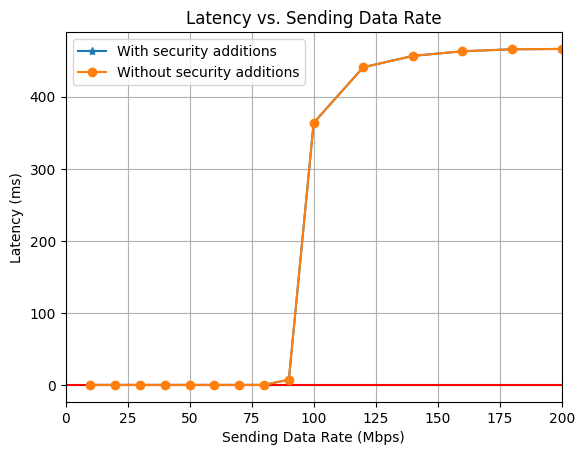

In [2]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(throughputs / 1e6, secure_datas.mean_latency() * 1000, '*-', label="With security additions")
ax.plot(throughputs / 1e6, insecure_datas.mean_latency() * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Sending Data Rate (Mbps)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. Sending Data Rate")
ax.set_xbound(0, max(throughputs / 1e6))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency.png")

<Figure size 2560x1920 with 0 Axes>

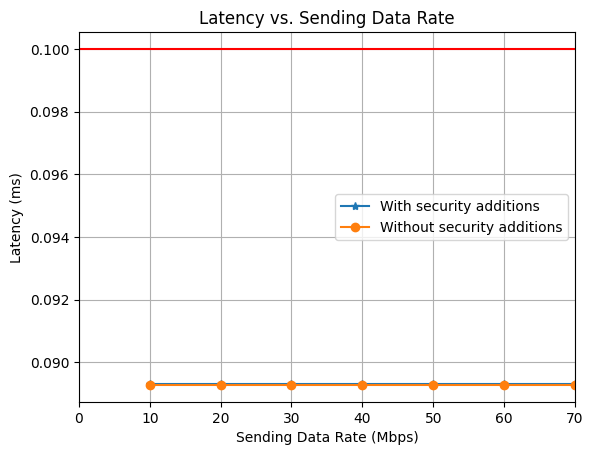

In [6]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(throughputs[:7] / 1e6, secure_datas.mean_latency()[:7] * 1000, '*-', label="With security additions")
ax.plot(throughputs[:7] / 1e6, insecure_datas.mean_latency()[:7] * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Sending Data Rate (Mbps)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. Sending Data Rate")
ax.set_xbound(0, max(throughputs[:7] / 1e6))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency_before_skyrocketing.png")

<Figure size 2560x1920 with 0 Axes>

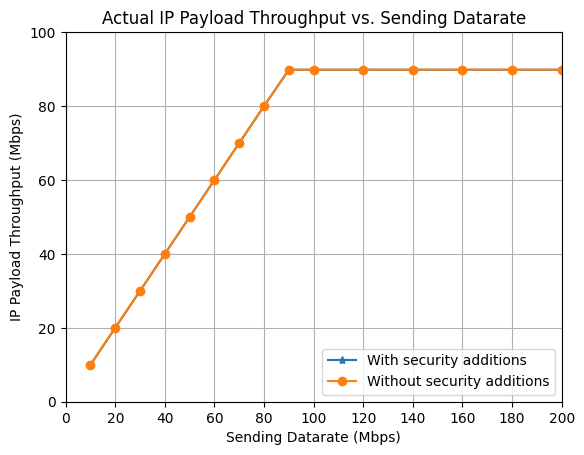

In [3]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(throughputs / 1e6, secure_datas.mean_throughput() / 1e6 * 8, '*-', label="With security additions")
ax.plot(throughputs / 1e6, insecure_datas.mean_throughput() / 1e6 * 8, 'o-', label="Without security additions")
ax.set_xlabel("Sending Datarate (Mbps)")
ax.set_ylabel("IP Payload Throughput (Mbps)")
ax.set_title("Actual IP Payload Throughput vs. Sending Datarate")
ax.set_xbound(0, max(throughputs / 1e6))
ax.set_xticks(range(0, 210, 20))
ax.set_ybound(0, 100)
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/throughput.png")

<Figure size 2560x1920 with 0 Axes>

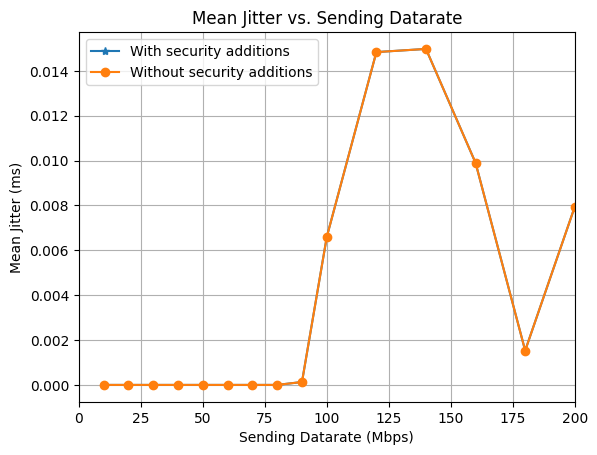

In [4]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(throughputs / 1e6, secure_datas.mean_jitter() * 1000, '*-', label="With security additions")
ax.plot(throughputs / 1e6, insecure_datas.mean_jitter() * 1000, 'o-', label="Without security additions")
ax.set_xlabel("Sending Datarate (Mbps)")
ax.set_ylabel("Mean Jitter (ms)")
ax.set_title("Mean Jitter vs. Sending Datarate")
ax.set_xbound(0, max(throughputs / 1e6))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/jitter.png")

<Figure size 2560x1920 with 0 Axes>

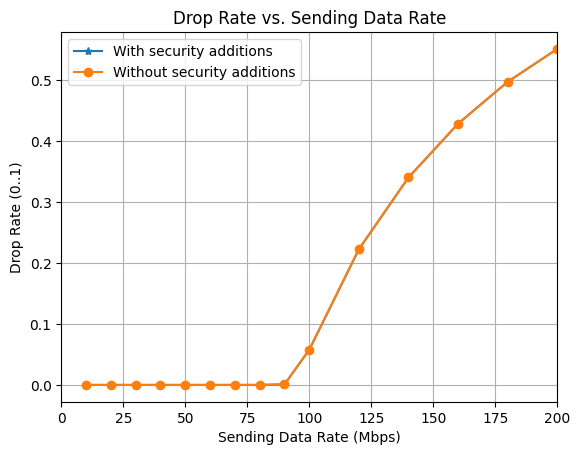

In [5]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(throughputs / 1e6, secure_datas.drop_rate(), '*-', label="With security additions")
ax.plot(throughputs / 1e6, insecure_datas.drop_rate(), 'o-', label="Without security additions")
ax.set_xlabel("Sending Data Rate (Mbps)")
ax.set_ylabel("Drop Rate (0..1)")
ax.set_title("Drop Rate vs. Sending Data Rate")
ax.set_xbound(0, max(throughputs / 1e6))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/drop_rate.png")